In [2]:
#pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [39]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [43]:
start_date = '2016-01-01'
end_date = '2022-02-02'

df = data.DataReader('TSLA', 'yahoo', start_date, end_date)

In [44]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,48.689999,47.674000,47.702000,48.001999,13575000.0,48.001999
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001


In [45]:
df = df.reset_index()
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1529,2022-01-27,935.390015,829.000000,933.359985,829.099976,49036500.0,829.099976
1530,2022-01-28,857.500000,792.010010,831.559998,846.349976,44929700.0,846.349976
1531,2022-01-31,937.989990,862.049988,872.710022,936.719971,34812000.0,936.719971
1532,2022-02-01,943.700012,905.000000,935.210022,931.250000,24379400.0,931.250000
1533,2022-02-02,931.500000,889.409973,928.179993,905.659973,22264300.0,905.659973


In [46]:
#Drop columns
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.tail()

,High,Low,Open,Close,Volume
1529,935.390015,829.000000,933.359985,829.099976,49036500.0
1530,857.500000,792.010010,831.559998,846.349976,44929700.0
1531,937.989990,862.049988,872.710022,936.719971,34812000.0
1532,943.700012,905.000000,935.210022,931.250000,24379400.0
1533,931.500000,889.409973,928.179993,905.659973,22264300.0


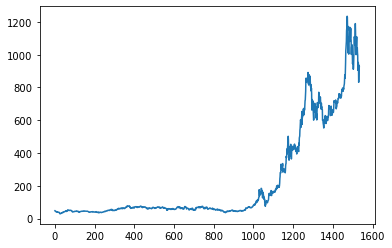

In [47]:
plt.plot(df.Open)

In [48]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1529    964.480698
1530    965.414998
1531    967.243497
1532    969.007397
1533    970.701297
Name: Close, Length: 1534, dtype: float64

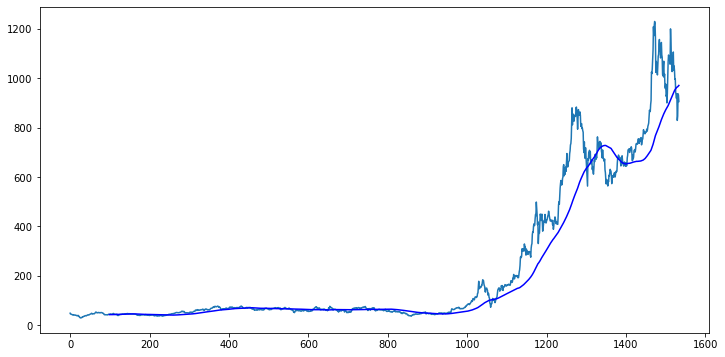

In [49]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'blue')

In [50]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1529    813.809149
1530    814.346649
1531    815.331348
1532    816.414448
1533    817.347798
Name: Close, Length: 1534, dtype: float64

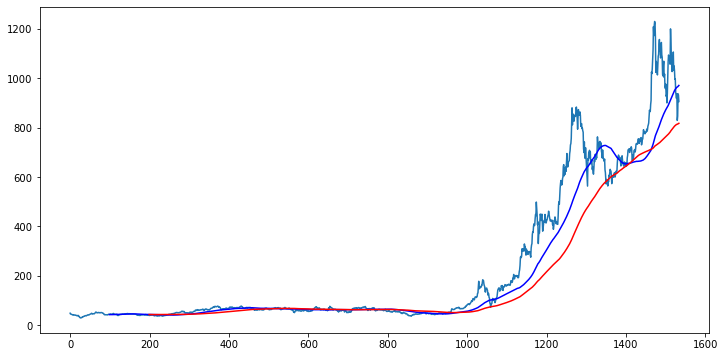

In [51]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'blue')
plt.plot(ma200, 'red')

In [52]:
df.shape

(1534, 5)

In [53]:
#Split data

In [54]:
data_t = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_tst = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_t.shape)
print(data_tst.shape)

(1073, 1)
(461, 1)


In [55]:
data_t.head()

,Close
0,48.001999
1,44.681999
2,44.686001
3,43.807999
4,43.130001


In [56]:
data_tst.head()

,Close
1073,109.089996
1074,109.767998
1075,114.599998
1076,130.190002
1077,141.977997


In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [58]:
data_t_array = scaler.fit_transform(data_t)
data_t_array

array([[0.1245105 ],
       [0.10305655],
       [0.1030824 ],
       ...,
       [0.40168013],
       [0.43468822],
       [0.48151215]])

In [59]:
data_t_array.shape

(1073, 1)

In [60]:
x_train = []
y_train = []

for i in range(100, data_t_array.shape[0]):
    x_train.append(data_t_array[i-100:i])
    y_train.append(data_t_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)    

In [61]:
#Model ML

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [62]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [64]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
31/31 [==============================] - 16s 327ms/step - loss: 0.0249
Epoch 2/50
31/31 [==============================] - 10s 326ms/step - loss: 0.0096
Epoch 3/50
31/31 [==============================] - 10s 330ms/step - loss: 0.0079
Epoch 4/50
31/31 [==============================] - 10s 327ms/step - loss: 0.0069
Epoch 5/50
31/31 [==============================] - 10s 315ms/step - loss: 0.0051
Epoch 6/50
31/31 [==============================] - 10s 326ms/step - loss: 0.0052
Epoch 7/50
31/31 [==============================] - 10s 325ms/step - loss: 0.0039
Epoch 8/50
31/31 [==============================] - 10s 316ms/step - loss: 0.0039
Epoch 9/50
31/31 [==============================] - 10s 328ms/step - loss: 0.0034
Epoch 10/50
31/31 [==============================] - 10s 328ms/step - loss: 0.0032
Epoch 11/50
31/31 [==============================] - 10s 325ms/step - loss: 0.0040
Epoch 12/50
31/31 [==============================] - 10s 329ms/step - loss: 0.0033
Epoch 13/50
3

In [65]:
model.save('keras_model.h5')

In [66]:
data_tst.head()

,Close
1073,109.089996
1074,109.767998
1075,114.599998
1076,130.190002
1077,141.977997


In [67]:
past_100_days = data_t.tail(100)

In [68]:
final_df = past_100_days.append(data_tst, ignore_index =True)

In [69]:
final_df.head()

,Close
0,69.986000
1,69.222000
2,69.870003
3,70.433998
4,69.998001


In [70]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.60957778e-03],
       [2.95329151e-03],
       [3.50993452e-03],
       [3.99441416e-03],
       [3.61988683e-03],
       [5.25716507e-03],
       [4.00300613e-03],
       [4.45141391e-03],
       [7.07831541e-04],
       [1.27477705e-03],
       [0.00000000e+00],
       [4.07178121e-04],
       [1.75240802e-04],
       [1.02222818e-03],
       [1.25072478e-03],
       [7.06114458e-04],
       [2.49114706e-04],
       [1.19746898e-03],
       [1.82282810e-03],
       [3.42231084e-03],
       [4.08547200e-03],
       [5.28465151e-03],
       [5.06302980e-03],
       [9.03339169e-03],
       [8.60216129e-03],
       [1.10348882e-02],
       [1.29058208e-02],
       [1.31721129e-02],
       [1.55137885e-02],
       [1.65497599e-02],
       [1.75273177e-02],
       [1.74311021e-02],
       [1.47372409e-02],
       [1.53608829e-02],
       [1.74104905e-02],
       [1.96009711e-02],
       [2.10664492e-02],
       [2.40764307e-02],
       [2.80416413e-02],
       [2.61861690e-02],


In [71]:
input_data.shape

(561, 1)

In [72]:
x_tst = []
y_tst = []

for i in range(100, input_data.shape[0]):
    x_tst.append(input_data[i-100:i])
    y_tst.append(input_data[i,0])

In [73]:
x_tst, y_tst = np.array(x_tst), np.array(y_tst)
print(x_tst.shape)
print(y_tst.shape)

(461, 100, 1)
(461,)


In [74]:
#Prediction

y_pred = model.predict(x_tst)

In [75]:
y_pred.shape

(461, 1)

In [76]:
y_tst

array([0.03720044, 0.03778285, 0.04193361, 0.05532563, 0.06545168,
       0.06887743, 0.07151976, 0.073011  , 0.07171733, 0.06147101,
       0.06926913, 0.06471981, 0.06807339, 0.08071807, 0.07562756,
       0.08102044, 0.07781976, 0.06397934, 0.07426516, 0.07547121,
       0.07794002, 0.07750363, 0.08426923, 0.08287247, 0.08254949,
       0.07937973, 0.08150492, 0.08079022, 0.08327449, 0.08230896,
       0.08360607, 0.08567458, 0.08383286, 0.08417474, 0.08440839,
       0.081931  , 0.08694591, 0.09778666, 0.09494505, 0.09518557,
       0.09199348, 0.09564944, 0.10668948, 0.10510031, 0.11959701,
       0.11062719, 0.10417429, 0.11372995, 0.11222324, 0.11388286,
       0.11597371, 0.11544798, 0.11431752, 0.11559917, 0.10856728,
       0.11288469, 0.10837658, 0.11689971, 0.12900494, 0.13584611,
       0.15114171, 0.17913182, 0.18227235, 0.17815253, 0.18303172,
       0.2088657 , 0.2006896 , 0.20408099, 0.20909935, 0.20130466,
       0.20133903, 0.2257625 , 0.21293914, 0.21705726, 0.20344

In [77]:
y_pred

array([[0.09280104],
       [0.09285721],
       [0.09291422],
       [0.09297556],
       [0.0930493 ],
       [0.09314632],
       [0.09327635],
       [0.09344831],
       [0.09366781],
       [0.09392946],
       [0.09421052],
       [0.09449098],
       [0.09475036],
       [0.09497587],
       [0.09519415],
       [0.09542017],
       [0.09567766],
       [0.09596984],
       [0.09625864],
       [0.09651724],
       [0.09673323],
       [0.09691132],
       [0.09706014],
       [0.09721334],
       [0.09739579],
       [0.09761734],
       [0.09786254],
       [0.09811608],
       [0.09836073],
       [0.09859107],
       [0.09880215],
       [0.09899496],
       [0.09917976],
       [0.09935793],
       [0.09952766],
       [0.09968631],
       [0.09982109],
       [0.09994006],
       [0.10010956],
       [0.10037689],
       [0.100761  ],
       [0.101236  ],
       [0.10177604],
       [0.10241306],
       [0.10316938],
       [0.10414916],
       [0.10535885],
       [0.106

In [78]:
scaler.scale_

array([0.00085901])

In [79]:
scale_factor = 1/0.00094081
y_pred = y_pred * scale_factor
y_tst = y_tst * scale_factor

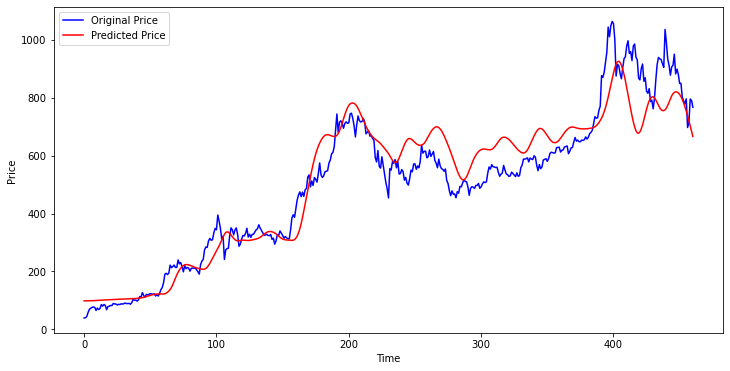

In [80]:
plt.figure(figsize=(12,6))
plt.plot(y_tst, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()